In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("CC GENERAL.csv")

# 2. Keep CUST_ID separate
customer_ids = df['CUST_ID']

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [71]:
# Quick look at the dataset 
df.shape

(8950, 18)

In [72]:
df.info

<bound method DataFrame.info of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE 

In [73]:
#Step 2 : Check for Missing Values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [74]:
#Step 3 : Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


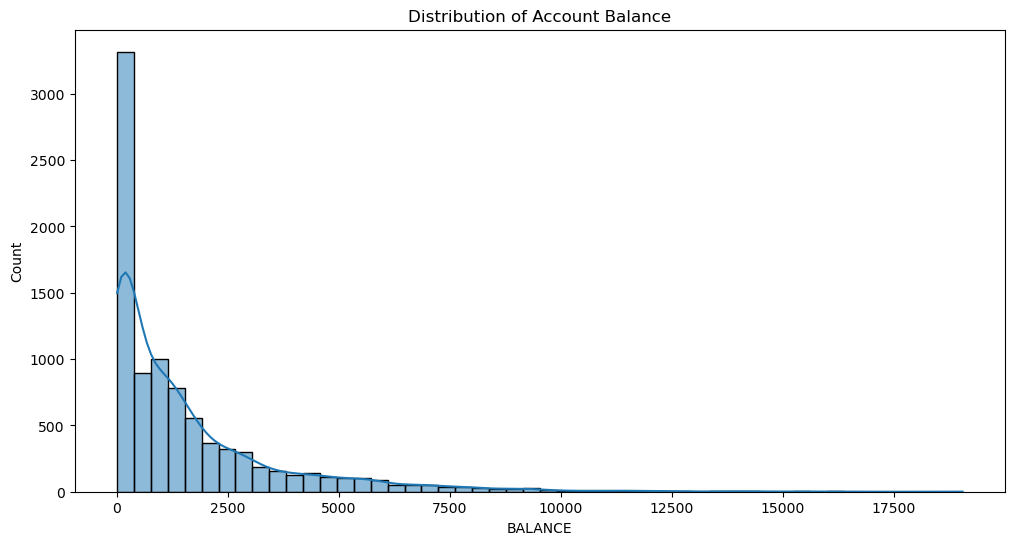

In [75]:
#Step 4 : Univariate Analysis (Distribution)

# Balance Column :
plt.figure(figsize = (12,6))
sns.histplot(df['BALANCE'], bins = 50, kde=True)
plt.title("Distribution of Account Balance")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


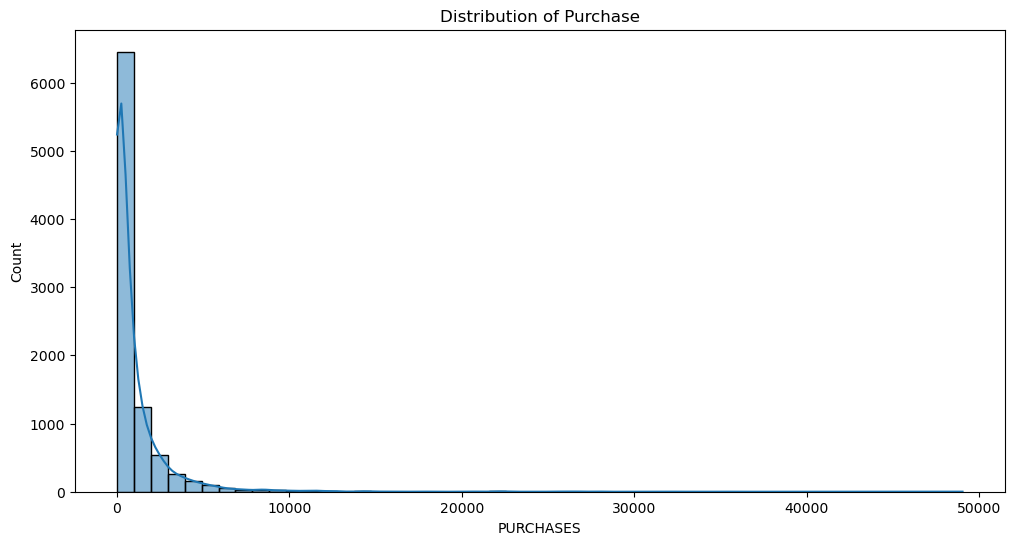

In [76]:
# Purchases Column :
plt.figure(figsize = (12,6))
sns.histplot(df['PURCHASES'], bins=50, kde= True)
plt.title("Distribution of Purchase")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


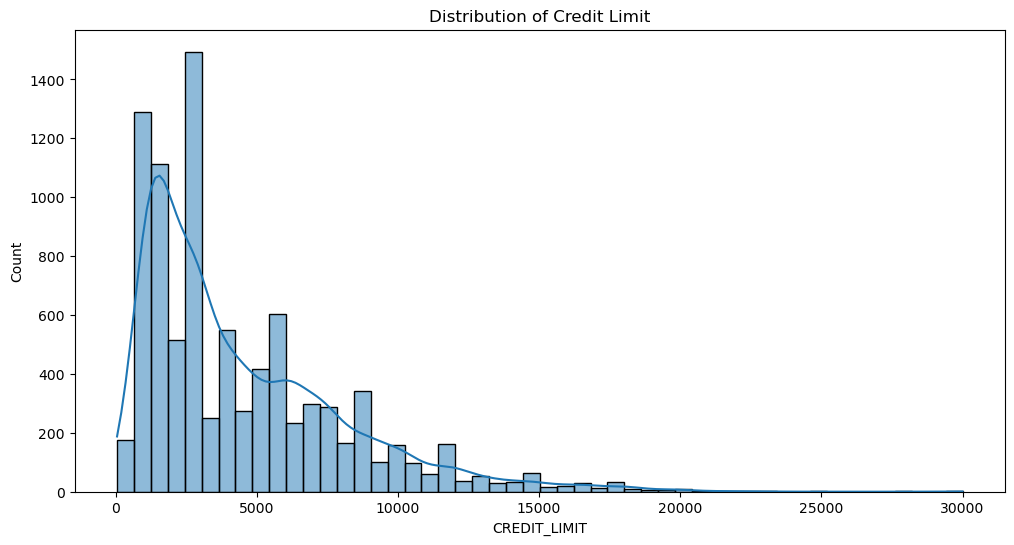

In [77]:
# Credit Limit Column :

plt.figure(figsize = (12,6))
sns.histplot(df['CREDIT_LIMIT'], bins = 50, kde = True)
plt.title("Distribution of Credit Limit")
plt.show()

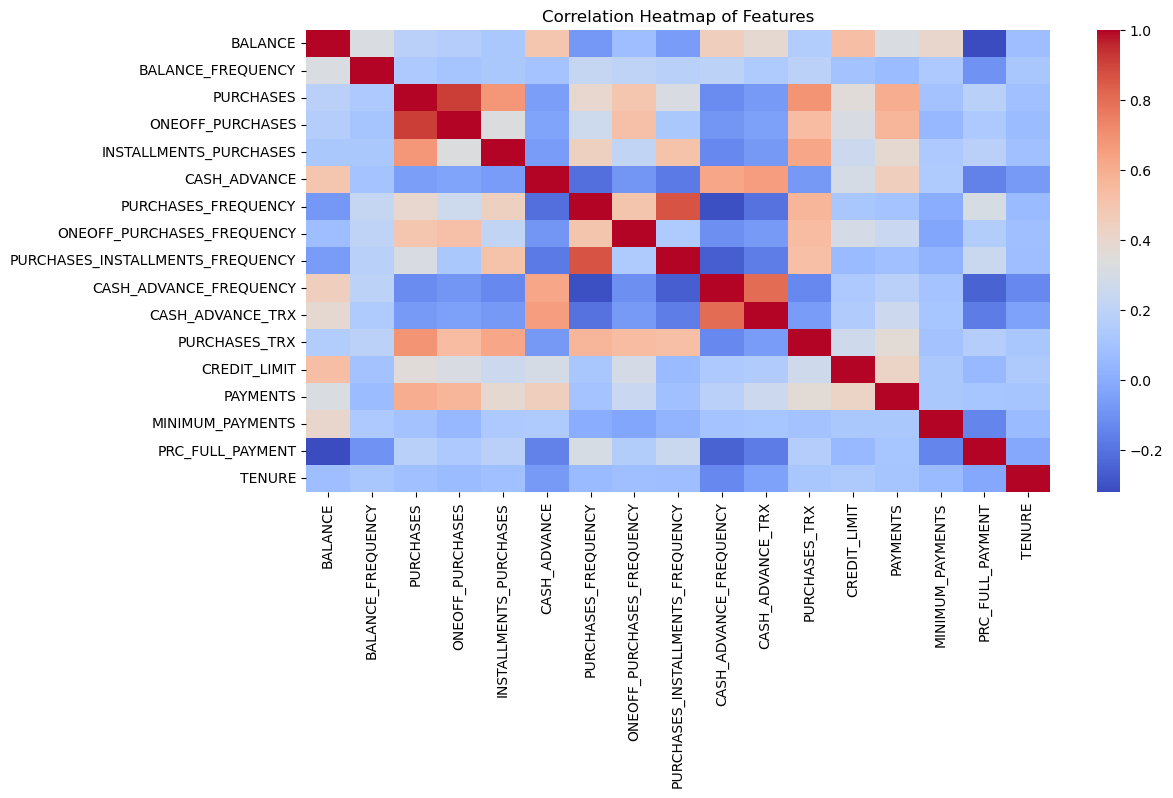

In [78]:
# Drop column cust_id before perform correlation analysis
df = df.drop(columns = ['CUST_ID'])
#Step 5 : Correlation Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

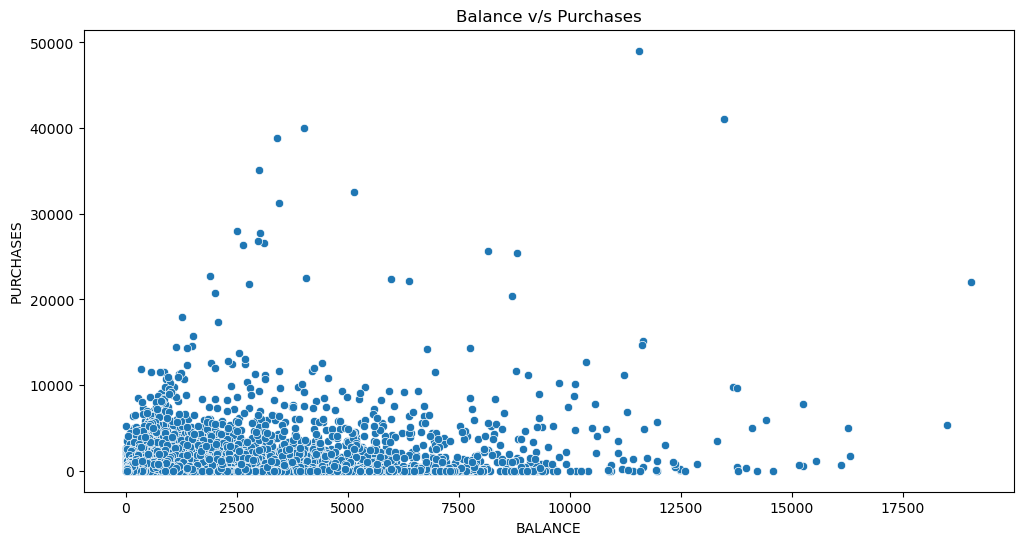

In [79]:
#Step 6 : Feature Relationship

plt.figure(figsize = (12,6))
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df)
plt.title("Balance v/s Purchases")
plt.show()

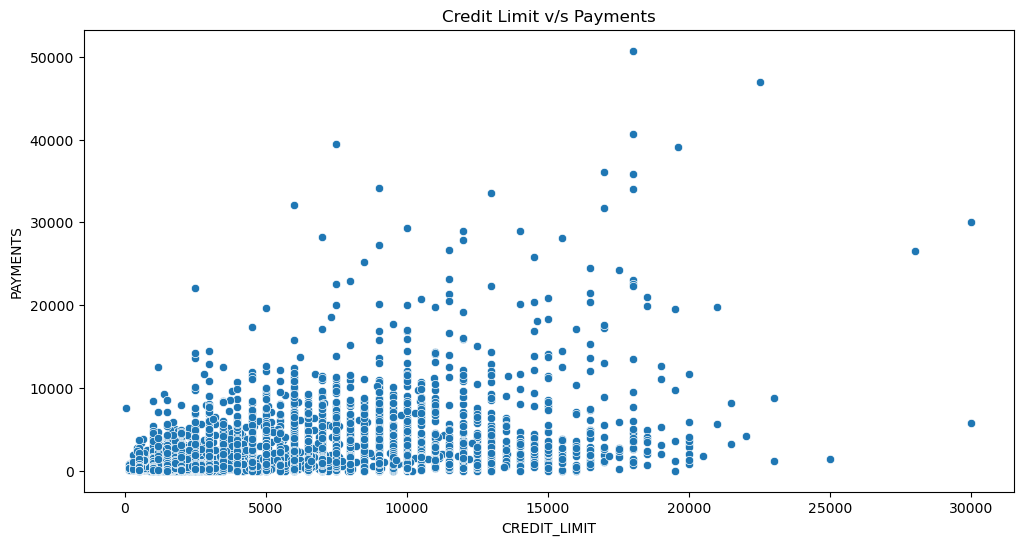

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='CREDIT_LIMIT',y='PAYMENTS',data=df)
plt.title("Credit Limit v/s Payments")
plt.show()

Purchase_Type
Both            4816
Installments    2260
One-off         1874
Name: count, dtype: int64


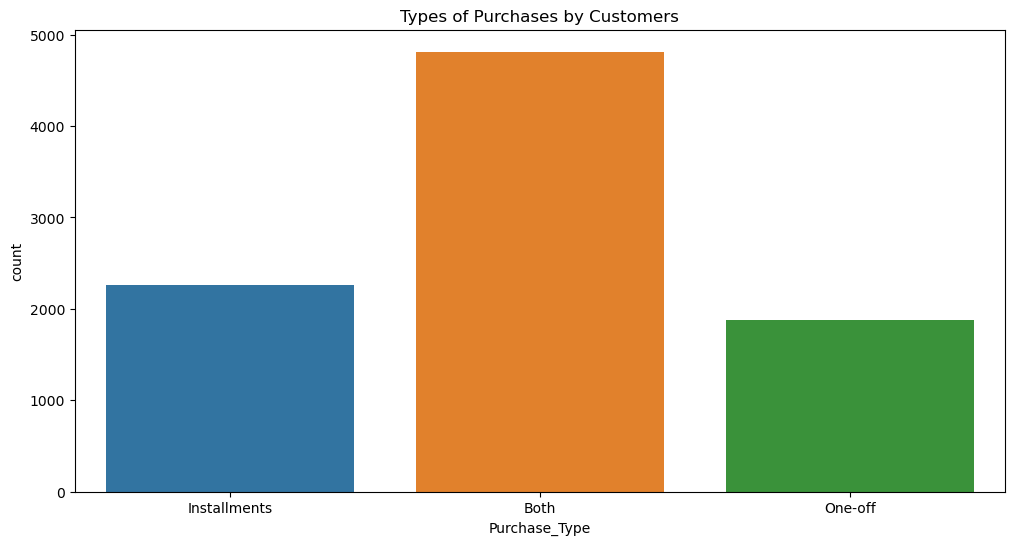

In [81]:
#Step 7 : Customer Behaviour Segments (Before clustering)
df['Purchase_Type'] = df.apply (
    lambda row: 'One-off' if row['ONEOFF_PURCHASES']>0 and row['INSTALLMENTS_PURCHASES']==0
    else ('Installments' if row['INSTALLMENTS_PURCHASES']>0 and row['ONEOFF_PURCHASES']==0
          else 'Both'),axis = 1
)

print(df['Purchase_Type'].value_counts())
plt.figure(figsize = (12,6))
sns.countplot(x='Purchase_Type',data=df)
plt.title("Types of Purchases by Customers")
plt.show()

In [82]:
#  Group by Purchase Type and calculate averages of key features
purchase_summary = df.groupby('Purchase_Type')[['BALANCE','PURCHASES','CREDIT_LIMIT','PAYMENTS','CASH_ADVANCE']].mean().round(2)

print("Average values by Purchase Type:\n")
print(purchase_summary)

Average values by Purchase Type:

               BALANCE  PURCHASES  CREDIT_LIMIT  PAYMENTS  CASH_ADVANCE
Purchase_Type                                                          
Both           1950.89    1306.25       5013.00   2167.34       1283.31
Installments    845.28     536.90       3371.86    994.20        419.96
One-off        1438.76     786.76       4515.92   1508.46        870.53


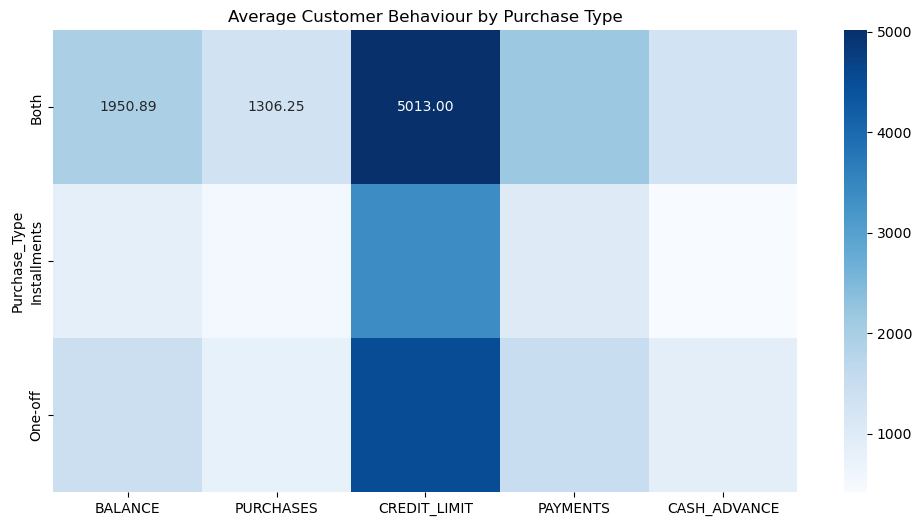

In [83]:
# Heatmap for Visualization
plt.figure(figsize = (12,6))
sns.heatmap(purchase_summary,annot=True,cmap="Blues",fmt=".2f")
plt.title("Average Customer Behaviour by Purchase Type")
plt.show()

In [84]:
# Step 8: Moving on to building Customer Segmentation
# AS we would be also include column "Purchase_Type", we would first need to convert it into numeric format.

#One-hot encode Purchase_type
purchase_dummies = pd.get_dummies(df['Purchase_Type'],prefix='PurchaseType')

#Feature Selection
features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]
X = df[features]

X = pd.concat([df[features], purchase_dummies],axis=1)

In [85]:
# Pre-processing the data : replace missing value with the respective column mean.
X.fillna(X.mean(),inplace = True)

In [86]:
#Scale features :
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [87]:
# Find the Optimal k using elbow method
inertia =[]
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state = 42,n_init = 10)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

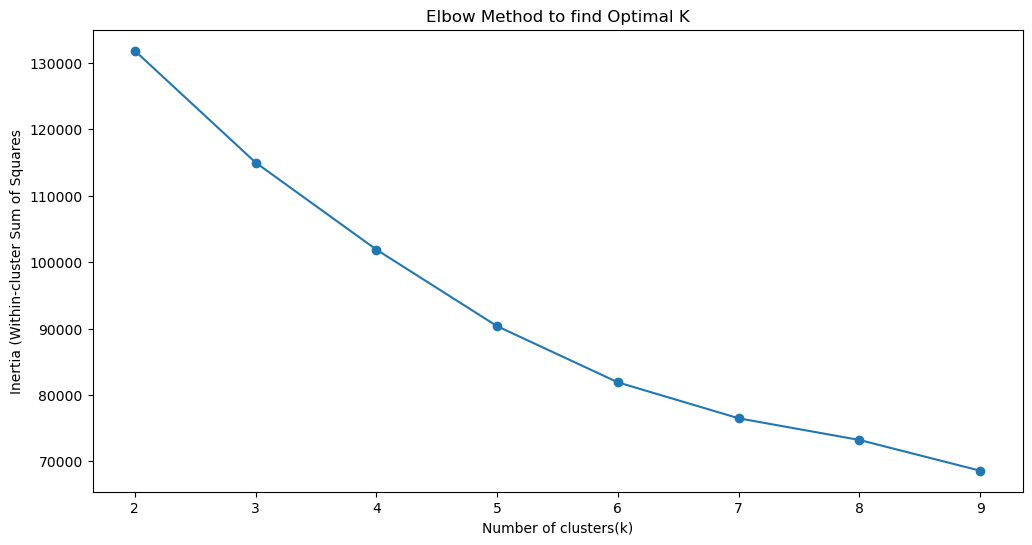

In [88]:
plt.figure(figsize=(12,6))
plt.plot(range(2,10),inertia, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares')
plt.title('Elbow Method to find Optimal K')
plt.show()

In [89]:
#Suppose Optimal K looks clear when K=4
optimal_k = 4

In [90]:
#Final Clustering
kmeans = KMeans(n_clusters=optimal_k,random_state = 42, n_init = 10)
df['Cluster'] = kmeans.fit_predict(x_scaled)

In [91]:
# Cluster Profiling
cluster_profile = df.groupby('Cluster')[features].mean().round(2)
print("Cluster Profile:\n",cluster_profile)

Cluster Profile:
          BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                 
0        4397.30     470.49            297.92                  172.66   
1        1073.53     570.97            420.85                  150.21   
2         589.38     491.61              0.00                  492.32   
3        2372.44    4941.96           3142.32                 1800.29   

         CASH_ADVANCE  PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster                                                              
0             4418.09                 0.27                    0.48   
1              506.95                 0.36                    0.10   
2              205.64                 0.70                    0.03   
3              437.86                 0.94                    0.05   

         PURCHASES_TRX  CASH_ADVANCE_TRX  CREDIT_LIMIT  PAYMENTS  \
Cluster                                               

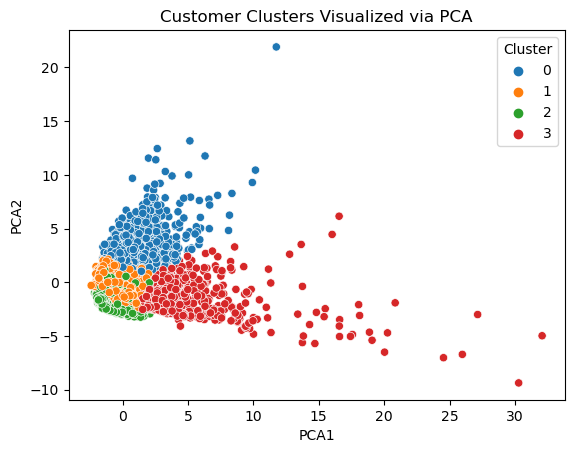

In [92]:
# Visualize clusters using PCA for dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)
df['PCA1'], df['PCA2'] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer Clusters Visualized via PCA')
plt.show()

In [96]:
#Add CUST_ID back (already in df)
df['CUST_ID'] = customer_ids

In [97]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Purchase_Type,Cluster,PCA1,PCA2,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,Installments,2,-1.938795,-1.092099,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,Both,0,0.401859,2.645988,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,One-off,1,-0.188315,-0.643656,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,NaN,0.000000,12,One-off,1,-0.620821,0.173273,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,One-off,1,-1.850865,-0.253019,C10005
